# 셀프 주유소는 정말 저렴할까

In [86]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [29]:
url = 'https://www.opinet.co.kr/user/main/mainView.do'
driver = webdriver.Chrome()
driver.get(url)

In [30]:
# 싼 주유소 찾기
driver.find_element_by_css_selector('.ic_m1').click()

- 서울 자치구 리스트 가져오기

In [31]:
metro = driver.find_element_by_xpath('//*[@id="SIDO_NM0"]')         # 광역시도
metro.send_keys('서울')
time.sleep(1)

In [32]:
sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')           # 시군구
gu_list = sigungu.find_elements_by_css_selector('option')
#gu_list
gu_names = [gu.text for gu in gu_list]
del gu_names[0]                                                       # 시/군/구

- 서울 자치구 리스트별 엑셀파일 다운받기

In [33]:
driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()

In [35]:
for gu in gu_names:
    sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
    sigungu.send_keys(gu)
    time.sleep(2)

    driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()
    time.sleep(2)


KeyboardInterrupt: 

In [87]:
driver.close()

InvalidSessionIdException: Message: invalid session id


2. 구별 휘발유 가격에 대한 데이터 정리

In [88]:
import pandas as pd
from glob import glob

In [89]:
glob('D:/Workspace/DataAnalysis/05.Crawling/주유소/지역*.xls')                  # 파일 이름이 리스트형태로 나옴

['D:/Workspace/DataAnalysis/05.Crawling/주유소\\지역_위치별(주유소) (1).xls',
 'D:/Workspace/DataAnalysis/05.Crawling/주유소\\지역_위치별(주유소) (10).xls',
 'D:/Workspace/DataAnalysis/05.Crawling/주유소\\지역_위치별(주유소) (11).xls',
 'D:/Workspace/DataAnalysis/05.Crawling/주유소\\지역_위치별(주유소) (12).xls',
 'D:/Workspace/DataAnalysis/05.Crawling/주유소\\지역_위치별(주유소) (13).xls',
 'D:/Workspace/DataAnalysis/05.Crawling/주유소\\지역_위치별(주유소) (14).xls',
 'D:/Workspace/DataAnalysis/05.Crawling/주유소\\지역_위치별(주유소) (15).xls',
 'D:/Workspace/DataAnalysis/05.Crawling/주유소\\지역_위치별(주유소) (16).xls',
 'D:/Workspace/DataAnalysis/05.Crawling/주유소\\지역_위치별(주유소) (17).xls',
 'D:/Workspace/DataAnalysis/05.Crawling/주유소\\지역_위치별(주유소) (18).xls',
 'D:/Workspace/DataAnalysis/05.Crawling/주유소\\지역_위치별(주유소) (19).xls',
 'D:/Workspace/DataAnalysis/05.Crawling/주유소\\지역_위치별(주유소) (2).xls',
 'D:/Workspace/DataAnalysis/05.Crawling/주유소\\지역_위치별(주유소) (20).xls',
 'D:/Workspace/DataAnalysis/05.Crawling/주유소\\지역_위치별(주유소) (21).xls',
 'D:/Workspace/DataAnalysis/05.Crawling/주유소\\지역_위치

In [90]:
file = glob('D:/Workspace/DataAnalysis/05.Crawling/주유소/지역*.xls')[0]
df = pd.read_excel(file,header=2)                                       # 2줄이 무의미한 줄이므로 3열부터 시작
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1977,1969,-
1,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1979,1915,-
2,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,2164,1983,1945,-
3,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,2144,1983,1960,-
4,서울특별시,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,현대오일뱅크,02-2226-4963,Y,2165,1985,1925,-


In [113]:
# 25개 파일을 읽어 하나의 데이터프레임으로 만듦
df_list = []
for file in glob('D:/Workspace/DataAnalysis/05.Crawling/주유소/지역*.xls'):
    gas_station = pd.read_excel(file,header=2)
    df_list.append(gas_station)

df = pd.concat(df_list)
#df.shape
df

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1977,1969,-
1,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1979,1915,-
2,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,2164,1983,1945,-
3,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,2144,1983,1960,-
4,서울특별시,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,현대오일뱅크,02-2226-4963,Y,2165,1985,1925,-
...,...,...,...,...,...,...,...,...,...,...
5,서울특별시,(주)성림에너지 남성주유소,서울 동작구 동작대로 135 (사당동),GS칼텍스,02-532-0606,Y,-,1985,1965,-
6,서울특별시,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),현대오일뱅크,02-817-9179,N,2169,1989,1949,-
7,서울특별시,대성산업(주) 노량진주유소,서울 동작구 노량진로 172,GS칼텍스,02-815-2354,N,-,1996,1929,1400
8,서울특별시,매일주유소,서울 동작구 상도로 139 (상도동),S-OIL,02-817-4085,Y,-,2059,1999,1500


In [114]:
df = df[['상호','주소','휘발유','셀프여부','상표']]
df

,상호,주소,휘발유,셀프여부,상표
0,방죽주유소,서울 강남구 밤고개로 215 (율현동),1977,Y,GS칼텍스
1,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1979,Y,SK에너지
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1983,Y,현대오일뱅크
3,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1983,Y,SK에너지
4,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1985,Y,현대오일뱅크
...,...,...,...,...,...
5,(주)성림에너지 남성주유소,서울 동작구 동작대로 135 (사당동),1985,Y,GS칼텍스
6,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1989,N,현대오일뱅크
7,대성산업(주) 노량진주유소,서울 동작구 노량진로 172,1996,N,GS칼텍스
8,매일주유소,서울 동작구 상도로 139 (상도동),2059,Y,S-OIL


In [115]:
df.rename(columns={'휘발유':'가격','셀프여부':'셀프'}, inplace=True)
df

C:\Users\leela\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,상호,주소,가격,셀프,상표
0,방죽주유소,서울 강남구 밤고개로 215 (율현동),1977,Y,GS칼텍스
1,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1979,Y,SK에너지
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1983,Y,현대오일뱅크
3,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1983,Y,SK에너지
4,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1985,Y,현대오일뱅크
...,...,...,...,...,...
5,(주)성림에너지 남성주유소,서울 동작구 동작대로 135 (사당동),1985,Y,GS칼텍스
6,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1989,N,현대오일뱅크
7,대성산업(주) 노량진주유소,서울 동작구 노량진로 172,1996,N,GS칼텍스
8,매일주유소,서울 동작구 상도로 139 (상도동),2059,Y,S-OIL


In [118]:
df['구'] = df.주소.str.split().str[1]
df.head()

C:\Users\leela\AppData\Local\Temp/ipykernel_18692/1497167407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['구'] = df.주소.str.split().str[1]


,상호,주소,가격,셀프,상표,구
0,방죽주유소,서울 강남구 밤고개로 215 (율현동),1977,Y,GS칼텍스,강남구
1,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1979,Y,SK에너지,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1983,Y,현대오일뱅크,강남구
3,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1983,Y,SK에너지,강남구
4,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,1985,Y,현대오일뱅크,강남구


In [119]:
df.구.unique()

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object)

In [120]:
df.info()                   # object 로 나오면 - 표시가 있다는 의미

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      474 non-null    object
 1   주소      474 non-null    object
 2   가격      474 non-null    object
 3   셀프      474 non-null    object
 4   상표      474 non-null    object
 5   구       474 non-null    object
dtypes: object(6)
memory usage: 25.9+ KB


In [121]:
# 가격이 '-' 는 삭제하고, 정수로 변환
df = df[df.가격 != '-']
df.가격 = df.가격.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      466 non-null    object
 1   주소      466 non-null    object
 2   가격      466 non-null    int32 
 3   셀프      466 non-null    object
 4   상표      466 non-null    object
 5   구       466 non-null    object
dtypes: int32(1), object(5)
memory usage: 23.7+ KB


C:\Users\leela\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [122]:
df.to_csv('서울_주유소(220418).csv', index=False)

# 3. 셀프 주유소가 정말 저렴한지 확인

In [123]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [124]:
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

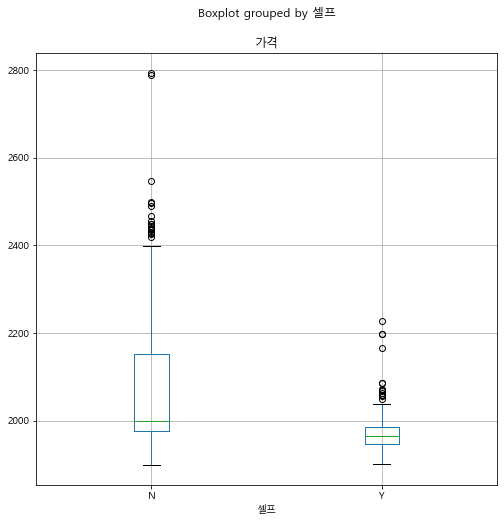

In [125]:
df.boxplot(column='가격', by='셀프', figsize=(8,8))
plt.show()

In [126]:
df[df.셀프 == 'Y'].가격.mean(), df[df.셀프 == 'N'].가격.mean()

(1973.8541666666667, 2089.1106194690265)

In [127]:
df[df.셀프 == 'Y'].shape, df[df.셀프 == 'N'].shape

((240, 6), (226, 6))

### 가설 검정
- 셀프 : 1973
- 일반 : 2090
셀프가 저렴하다. - 입증 \
    귀무가설 : 셀프와 일반주유소의 가격차이가 없다. \
    대립가설 : 셀프가 일반주유소보다 가격이 싸다. 

2-sample T 검정(TEST) \
    1. 정규성 통과 \
    2. T test \
    3. p-value \
            p < 0.05 - 귀무가설 기각, 대립가설 채택 \
            p > 0.05 - 귀무가설 채택

In [128]:
import scipy as sp
sp.stats.ttest_ind(df[df.셀프 == 'Y'].가격, df[df.셀프 == 'N'].가격, equal_var=False)

Ttest_indResult(statistic=-9.687837563862873, pvalue=4.587334527484735e-19)

- p-value가 0.05보다 작으므로 귀무가설 기각, 즉 대립가설 채택 \
-- H0(귀무가설): 셀프주유소와 일반주유소의 가격 차이가 없다.\
-- H1(대립가설): 셀프주유소의 가격이 일반주유소보다 저렴하다.

- 상표별로 가격 확인

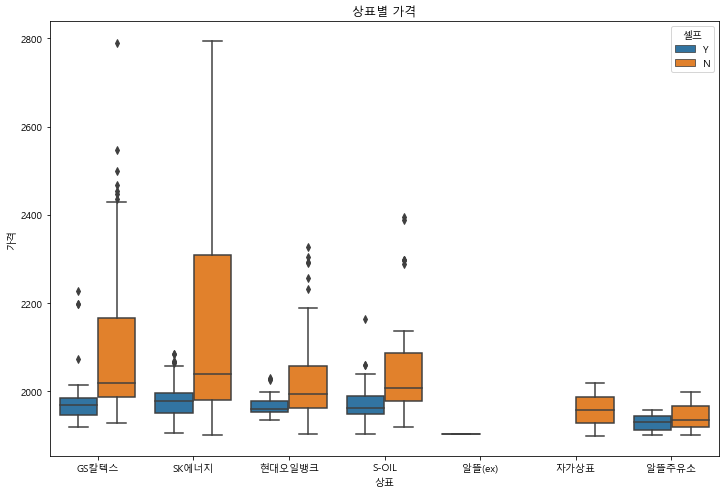

In [129]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=df)
plt.title('상표별 가격')
plt.show()

# 4. 구별 휘발유 가격 비교

In [135]:
import json, folium

In [146]:
# 가격이 착한 주유소 Top 5
df.sort_values(by='가격', ascending=True).head()

,상호,주소,가격,셀프,상표,구
0,정호주유소,서울 성동구 고산자로 307 (마장동),1898,N,자가상표,성동구
0,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1902,N,알뜰주유소,강서구
0,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1902,N,SK에너지,양천구
1,화곡역주유소,서울 강서구 강서로 154 (화곡동),1902,Y,알뜰주유소,강서구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1904,Y,알뜰(ex),서초구


In [137]:
# 가격이 비싼 주유소 Top 5
df.sort_values(by='가격', ascending=False).head()

,상호,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2794,N,SK에너지,중구
12,서계주유소,서울특별시 용산구 청파로 367 (청파동),2789,N,GS칼텍스,용산구
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2548,N,GS칼텍스,강남구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2499,N,GS칼텍스,중구
31,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2497,N,SK에너지,서초구


In [138]:
# 구별 비교
df.groupby('구')['가격'].agg(['mean','min','max']).sort_values(by='mean', ascending=False)

,mean,min,max
구,,,
용산구,2384.076923,2232,2789
중구,2288.100000,1959,2794
종로구,2243.500000,2049,2438
강남구,2131.848485,1977,2548
강동구,2072.928571,1969,2298
성동구,2070.470588,1898,2328
서초구,2047.968750,1904,2497
영등포구,2035.461538,1946,2428
구로구,2030.571429,1919,2448


- 구별 비교한 것을 단계구분도로 표시

In [139]:
gu_data = df.groupby('구')[['가격']].mean()
gu_data.head(3)

,가격
구,
강남구,2131.848485
강동구,2072.928571
강북구,1960.461538


In [140]:
filename = '../04.지도시각화/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(filename, encoding='utf-8'))

In [141]:
import numpy as np

def get_text_location(geo_str):
    gu_dict = {}
    for gu in geo_str['features']:
        for coord in gu['geometry']['coordinates']:
            geo = np.array(coord)
            gu_dict[gu['id']] = [np.mean(geo[:,1]), np.mean(geo[:,0])]
    return gu_dict

In [142]:
from folium.features import DivIcon

gu_dict = get_text_location(geo_str)

In [148]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(
    geo_data=geo_str,
    data=gu_data.가격,
    columns=[gu_data.index, gu_data.가격],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)
for gu_name in gu_data.index:
    folium.Marker(
        location=gu_dict[gu_name],
        icon=DivIcon(icon_size=(80,20), icon_anchor=(20,0),
            html=f'<div style="font-size: 10pt">{gu_name}</div>'
        )
    ).add_to(map)
title_html = '<h3 align="center" style="font-size:20px">구별 휘발유 가격</h3>'    
map.get_root().html.add_child(folium.Element(title_html)) 
#map

# 과제 : 구별로 가격이 싼/비싼 주유소 각 1곳을 지도위에 표시

In [150]:
df.sort_values(index='구', by='가격', ascending=True).head()

TypeError: sort_values() got an unexpected keyword argument 'index'

In [168]:
showing_data = df.groupby('구')['가격'].agg(['min','max']).sort_values(by='구', ascending=False)
showing_data

,min,max
구,,
중랑구,1945,2069
중구,1959,2794
종로구,2049,2438
은평구,1958,2025
용산구,2232,2789
영등포구,1946,2428
양천구,1902,2197
송파구,1965,2178
성북구,1935,2099


In [164]:
price_high = df.sort_values(by='가격', ascending=False).head(10)
price_high

,상호,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2794,N,SK에너지,중구
12,서계주유소,서울특별시 용산구 청파로 367 (청파동),2789,N,GS칼텍스,용산구
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2548,N,GS칼텍스,강남구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2499,N,GS칼텍스,중구
31,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2497,N,SK에너지,서초구
11,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2490,N,SK에너지,용산구
7,약수주유소,서울 중구 다산로 173,2468,N,GS칼텍스,중구
31,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2455,N,GS칼텍스,강남구
6,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2449,N,SK에너지,중구
20,구로주유소,서울 구로구 구로동로 137 (구로동),2448,N,GS칼텍스,구로구


In [170]:
import requests
from urllib.parse import quote
import pandas as pd

In [173]:
with open('kakaoapikey.txt') as file:
    kakao_key = file.read()
len(kakao_key)

32

In [178]:
lng_list, lat_list = [], []
for i in df.index:
    url = f'{local_url}?query={quote(df.도로명주소[i])}'
    result = requests.get(url, headers=header).json()
    lng_list.append(float(result['documents'][0]['x']))
    lat_list.append(float(result['documents'][0]['y']))

NameError: name 'local_url' is not defined

In [ ]:
df['위도'] = lat_list
df['경도'] = lng_list
df

In [ ]:
local_url = 'https://dapi.kakao.com/v2/local/search/address.json'
addr = '서울특별시 서초구 남부순환로 2584(서초동)'
url = f'{local_url}?query={quote(addr)}'
url